# CSc 85040 - Randomized Algorithms for Matrices
------
## Homework Week 10
## VISHAL BHARTI

In [1]:
# import the required libraries
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.linalg import hadamard

In [2]:
# Set m = 16384, n = 100 
m, n = 2**14, 100
# Set the random number seed
np.random.seed(123456)
# Generate a random mxn matrix M where row entries are i.i.d
M = np.random.randn(m, n)
# SVD of the matrix A
u, s, vh = np.linalg.svd(M, full_matrices=False)
# generate a new eigenmatrix with large eigenvalues 
S = np.linspace(1,1000000,n)
# generate a new matrix A = USV^T
A = np.dot(u*S, vh)
# generate a gaussian random vector from the std normal distribution
b = np.random.normal(0,1, m)

### Least squares solution approximation
To get the approximate least solution $x_{opt}$ for least square minimization ${\big|\big|Ax-b\big|\big|_2}$, we run the least square approximation function *lstsq* from the numpy linalg library. This function returns the optimal $x$, $x_{opt}$ and the resulting sum of squared residuals $res_{opt}$

In [3]:
# get the least squares approximation using all the rows of A
x_opt, res, _, _ = np.linalg.lstsq(A, b, rcond=None)
res_opt = res.item()

### Fast least squares approximation via SRHT projection
#### Generating a sampled matrix $A_{sub}$

$A_{sub} = P H D A$
* $A_{sub}$ is the resulting sampled matrix.
* $P$ is a $c\times M$ sampling matrix that randomly selects 'c' rows from the resulting matrix $H D A_n$.
* $H$ is a $M \times M$ hadamard matrix.
* $D$ is a $M\times M$ diagonal matrix, with diagonal values sampled randomly from $\{\pm1\}$.

#### To compute the fast least squares approximation :
1. Generate the SRHT sampling matrix $R = PHD$
2. Using the sampling matrix generate sampled matrices $A_{sub} = RA$ and $b_{sub} = Rb$
3. The least squares approximation solution $\big|\big|A_{sub}x_{out} - b_{sub}\big|\big|_2$ would give us a fast solution to the least squares approximation $\big|\big|Ax_{opt} - b\big|\big|_2$

#### To compare the results, we calculate the sum of squared residuals $res_{out}$ for $x=x_{out}$ and then compute the ratio $\frac{res_{out}}{res_{opt}}$.
#### The number of sampled rows 'c' is varied from 10-50% of the value of m ($2^{14}$)

In [4]:
# c varied from 10-50%
C_arr = [round(0.1*m), round(0.2*m), round(0.3*m),  round(0.4*m), round(0.5*m)]

# array that stores the ratios for each value of c
res_arr = []

# Go through all values of c and approximate the least squares solution
for c in C_arr:
    # select c indices randomly
    P_idx = random.sample(range(0,m), c)
    # generate the hadamard matrix and normalize it
    H = 1/np.sqrt(m) * hadamard(m)
    # diagonal matrix with +-1 (vector here as numpy broadcast has the same effect)
    D = np.random.choice([1,-1], m)

    # generate the sampling matrix
    R = (H*D)[P_idx,:]
    
    # sample c rows from A
    A_sub = np.matmul(R, A)
    # sample c values from b
    b_sub = np.matmul(R, b)
    
    # run the least square solver on the sampled matrices
    x_out, _, _, _ = np.linalg.lstsq(A_sub, b_sub, rcond=None)
    # compute the squared residuals
    res_out = np.sum((A.dot(x_out) - b)**2)
    
    #save the results to res_arr array
    res_arr.append(res_out/res_opt)

### Plotting the results

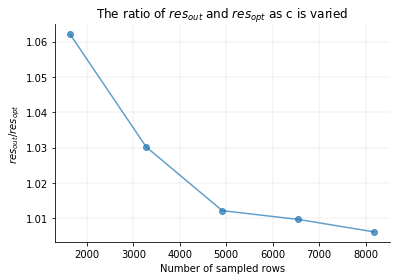

In [5]:
ax = plt.subplot(111)

ax.plot(C_arr, res_arr, '-o', alpha=0.70)
ax.set_title("The ratio of $res_{out}$ and $res_{opt}$ as c is varied")
ax.set_xlabel("Number of sampled rows")
ax.set_ylabel(r"$res_{out}/res_{opt}$")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()